In [1838]:
import math
import random
import matplotlib.pyplot as plt
from time import sleep


In [1839]:
class Moon_Region:


    radius = 10
    width = 6

    def __init__(self, samples: int, theta0: float, theta1: float,
            distance_right: float, distance_up: float):
        self.x = list()
        self.y = list()
        for _ in range(samples):
            theta = random.uniform(theta0, theta1)
            rho = self.radius+random.uniform(0, self.width)
            x_sample = distance_right + rho*math.cos(theta)
            y_sample = distance_up + rho*math.sin(theta)
            self.x.append(x_sample)
            self.y.append(y_sample)

    def get_beta(self):
        return max([x**2+y**2 for x,y in zip(self.x, self.y)])

    def get_points(self):
        return [(x,y) for x,y in zip(self.x, self.y)]


In [1840]:
def error_correction_learning_rule(eta: float, weights: list, label: int,
        output: int, input: list):
    return [w+eta*(label-output)*x for w,x in zip(weights, input)]

In [1841]:
d = -10
N = 10_000
epochs = 100
learning_rate = 1e-6

In [1842]:
upper_moon = Moon_Region(N, 0, 3.1415, 0, 0)

In [1843]:
bottom_moon = Moon_Region(N, 3.1415, 2*3.1415,
    Moon_Region.radius, d
)

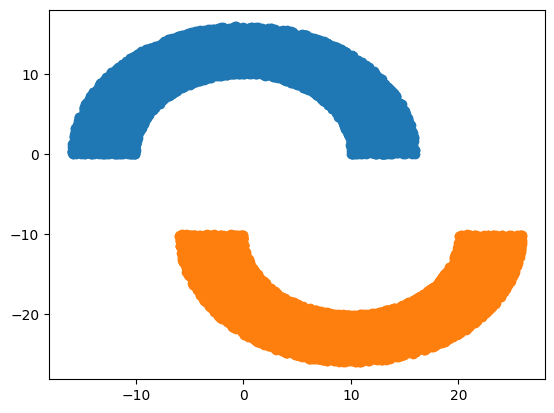

In [1844]:
plt.scatter(upper_moon.x, upper_moon.y);
plt.scatter(bottom_moon.x, bottom_moon.y);

In [1845]:
beta = upper_moon.get_beta()
print(beta)

255.9681504485276


In [1846]:
weights = [0,1,-d/2] #weight0, weight1, bias

In [1847]:
inputs_and_labels = ([(x,y,1) for x,y in upper_moon.get_points()]
    +[(x,y,-1) for x,y in bottom_moon.get_points()]
)

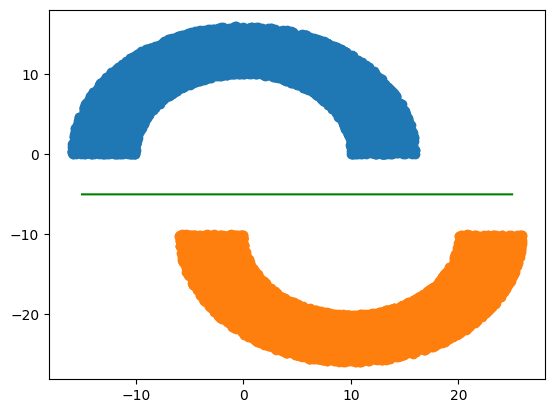

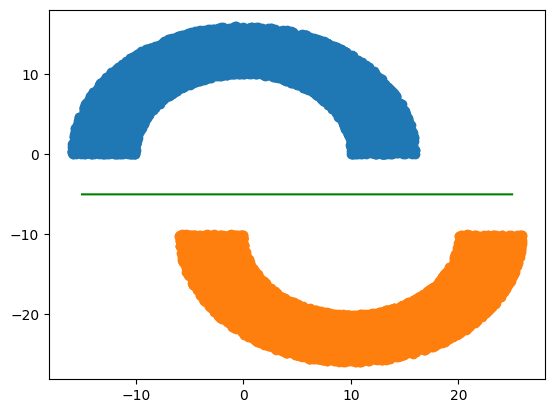

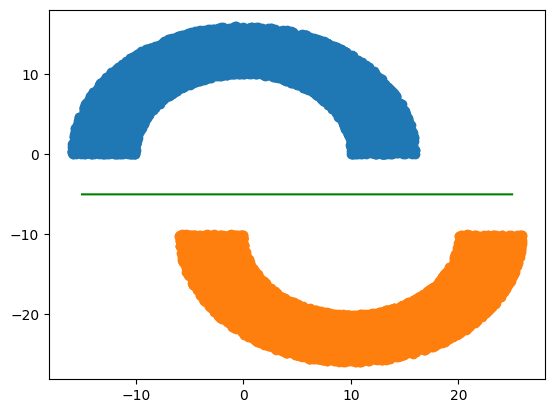

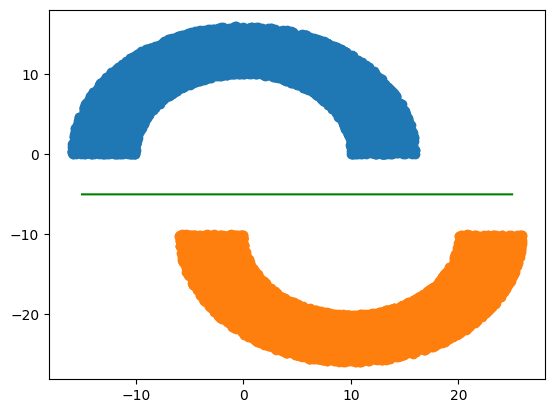

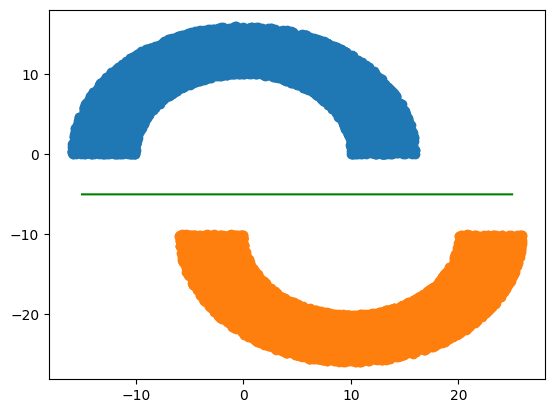

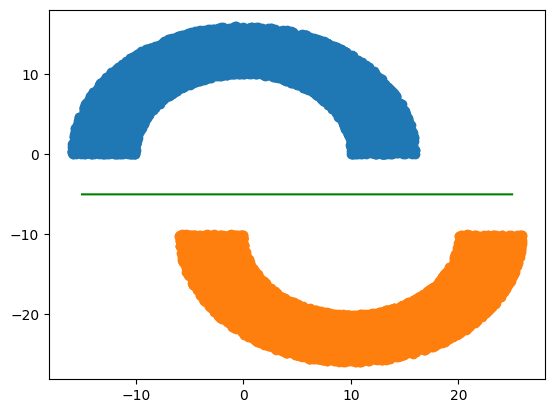

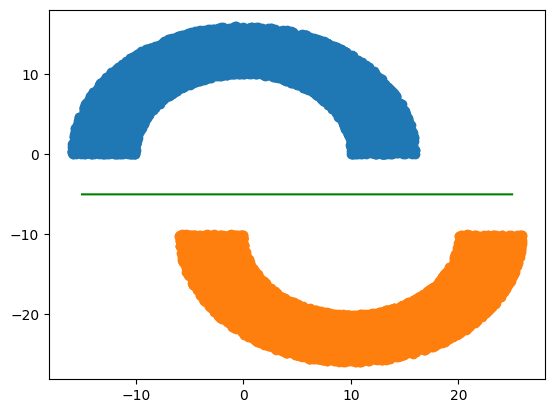

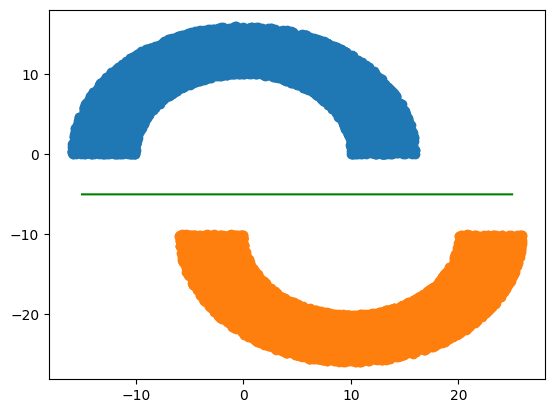

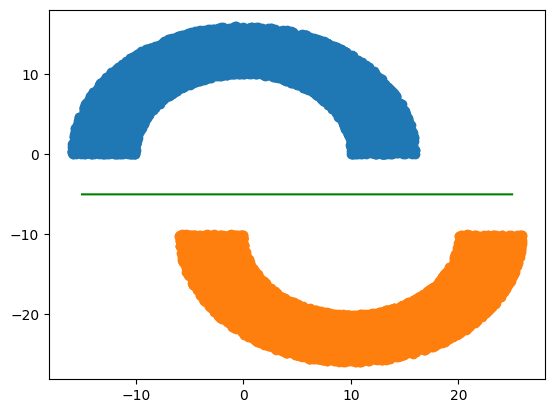

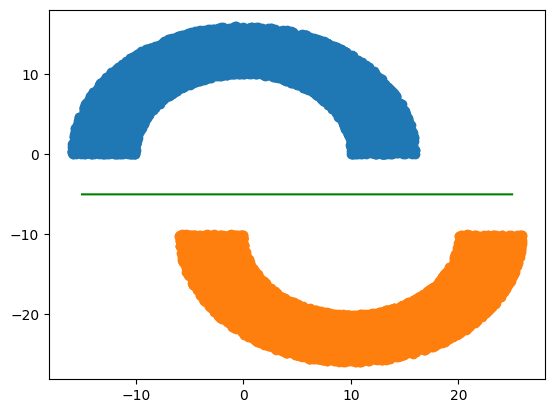

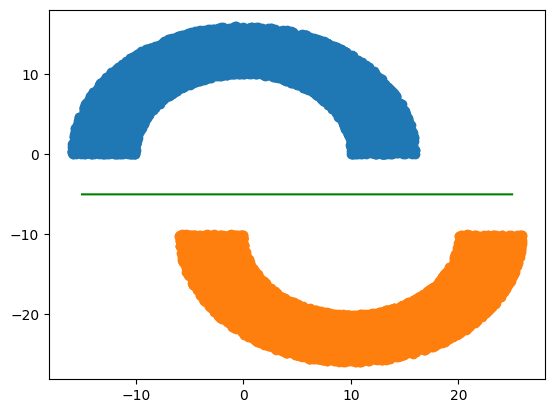

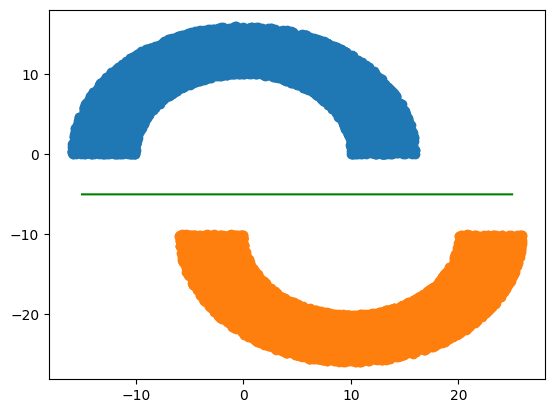

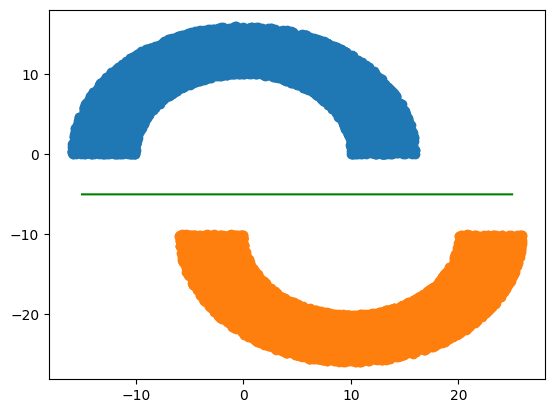

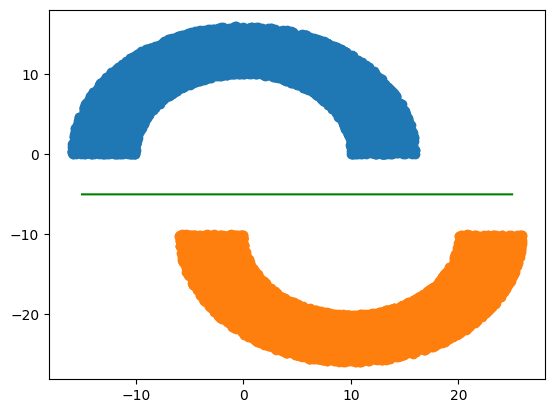

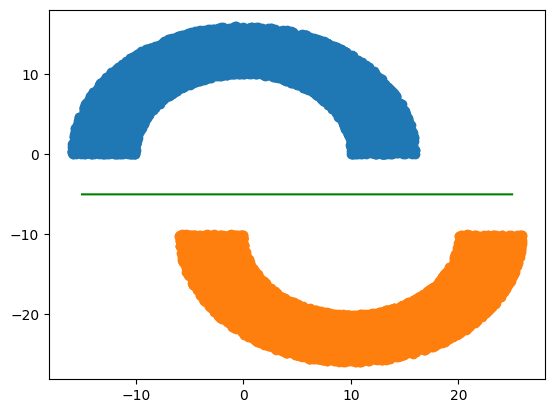

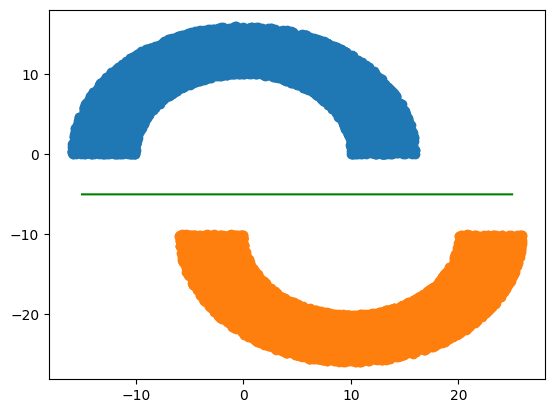

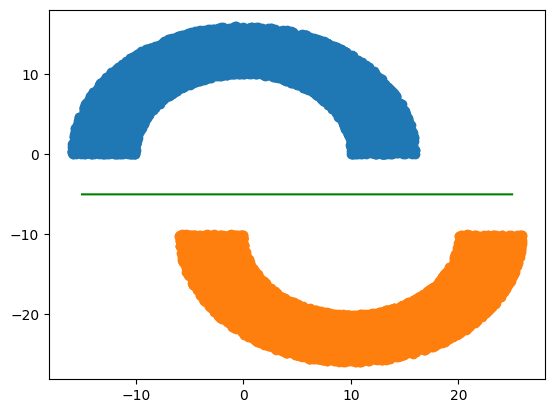

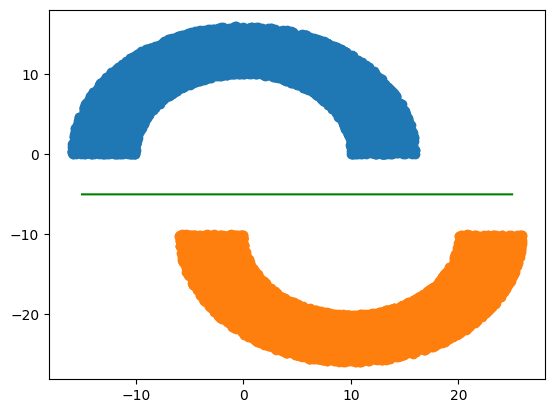

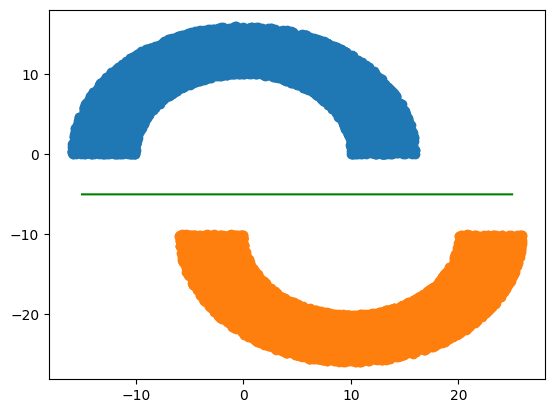

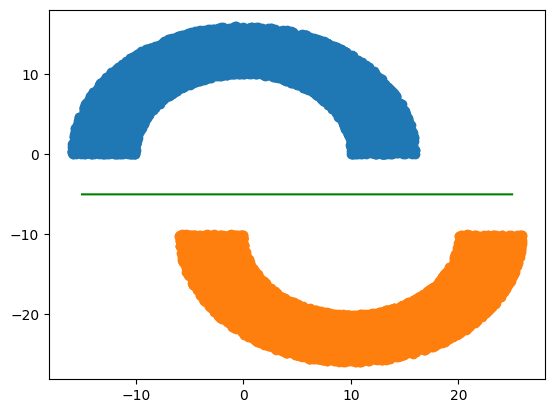

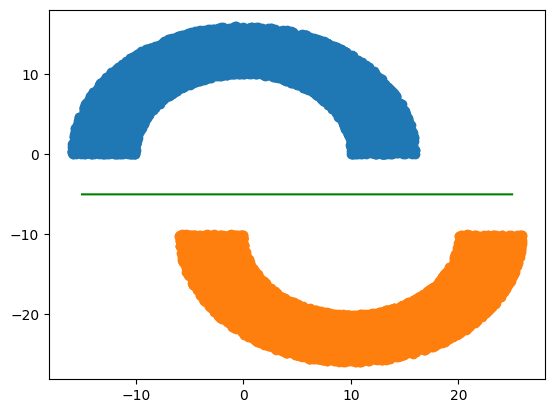

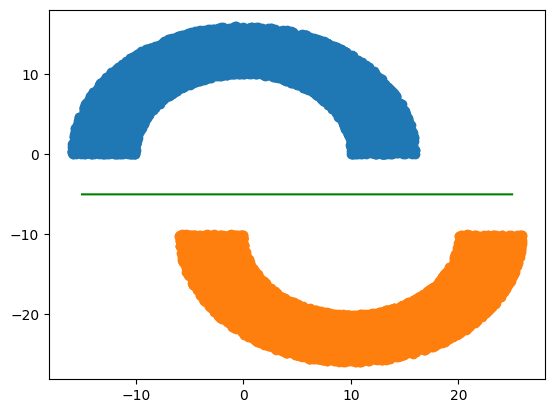

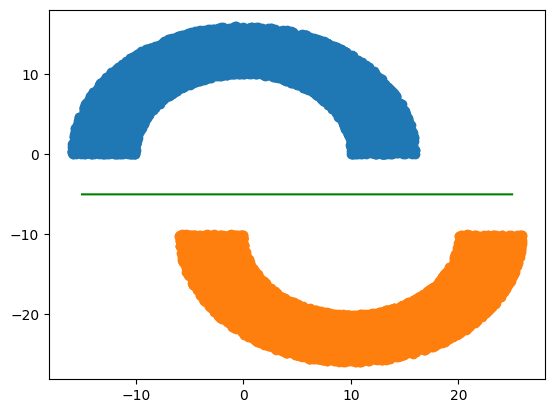

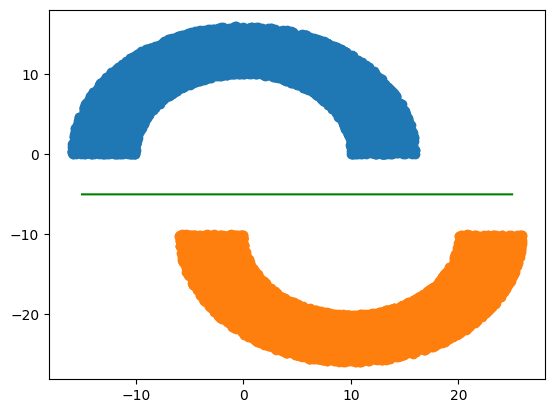

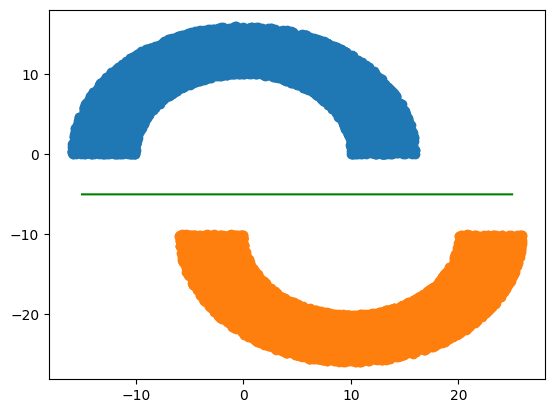

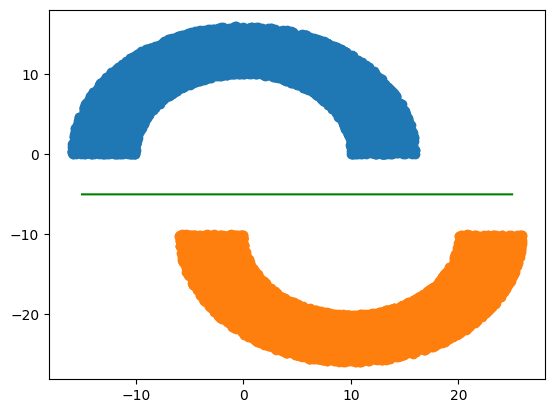

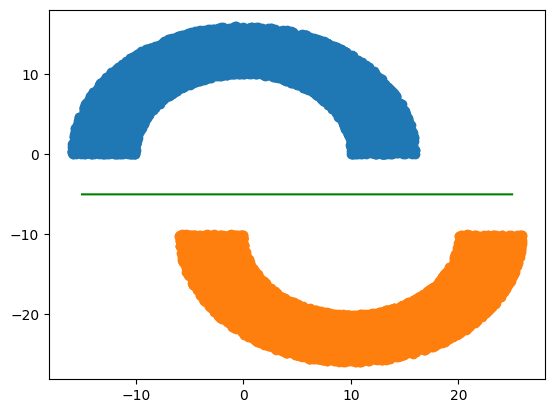

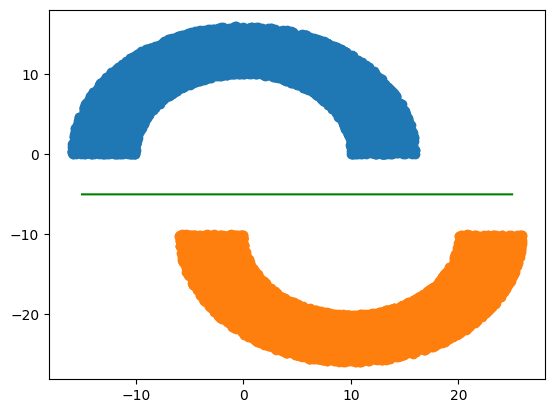

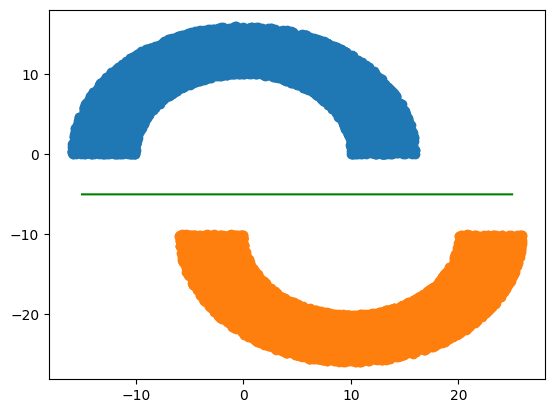

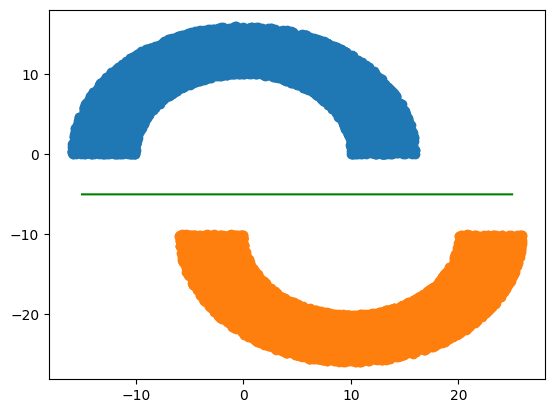

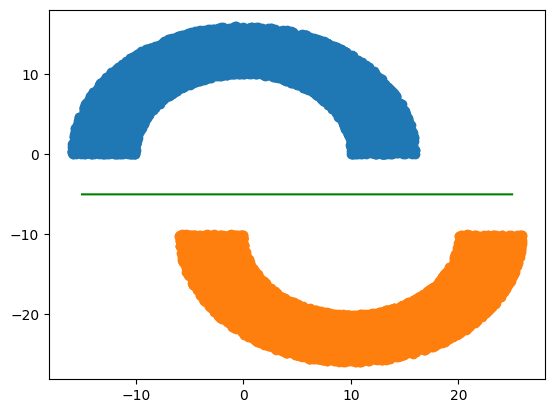

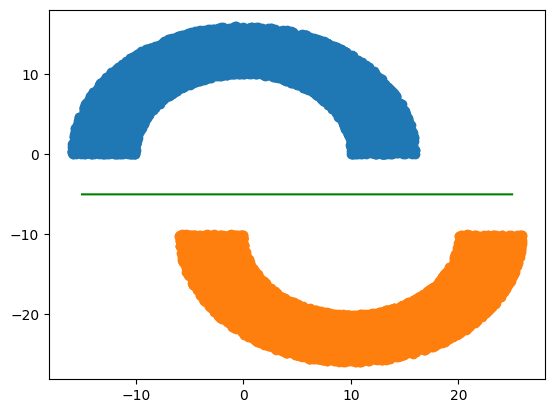

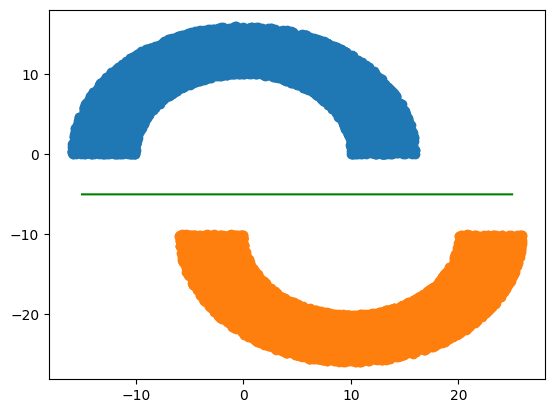

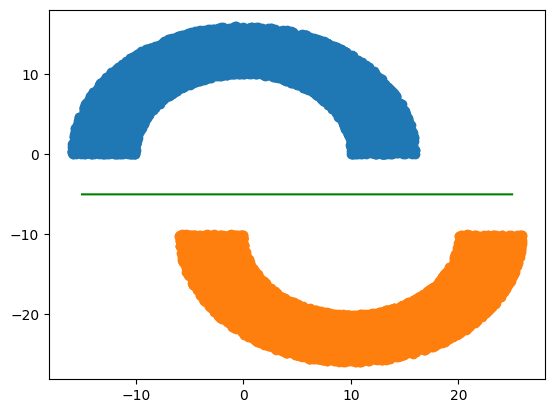

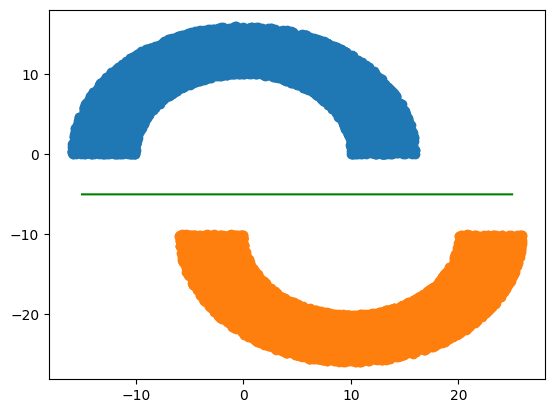

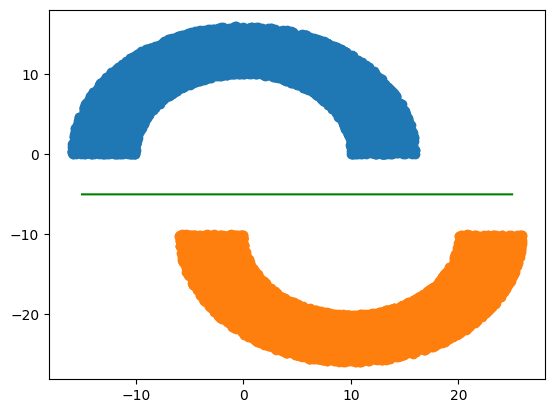

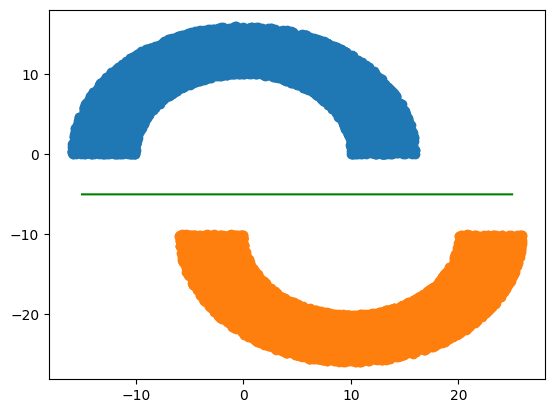

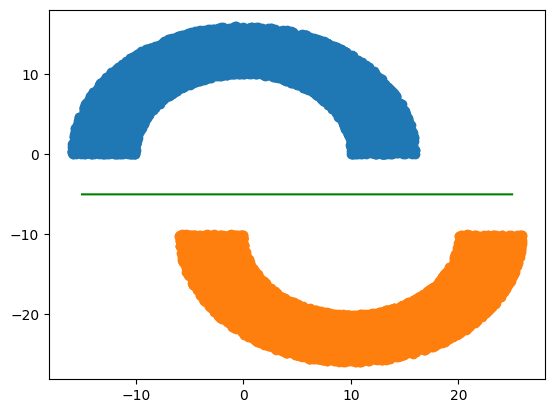

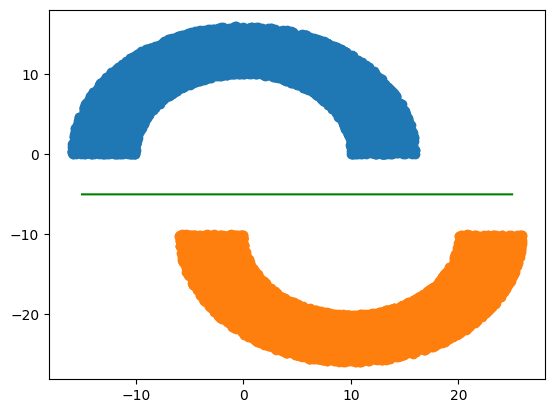

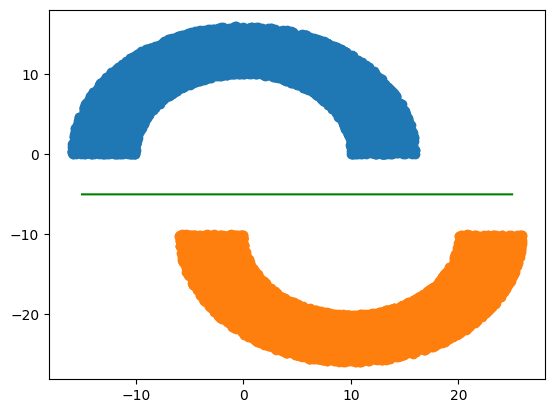

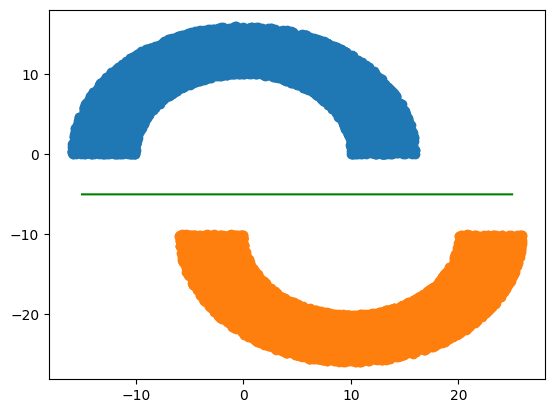

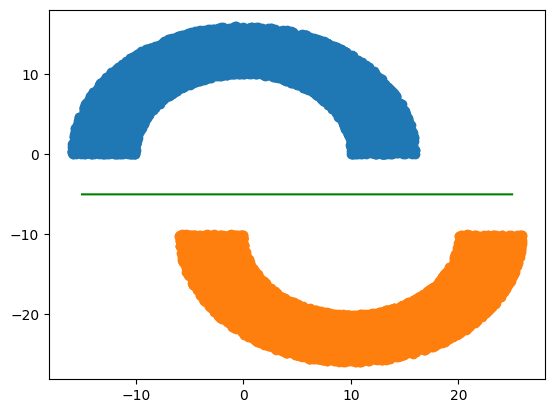

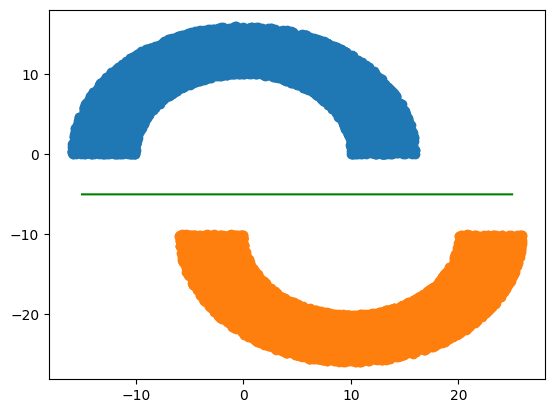

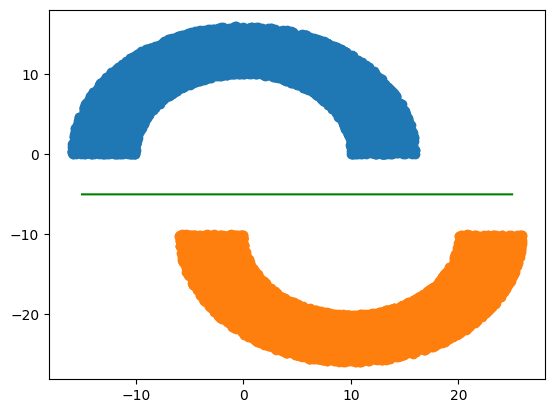

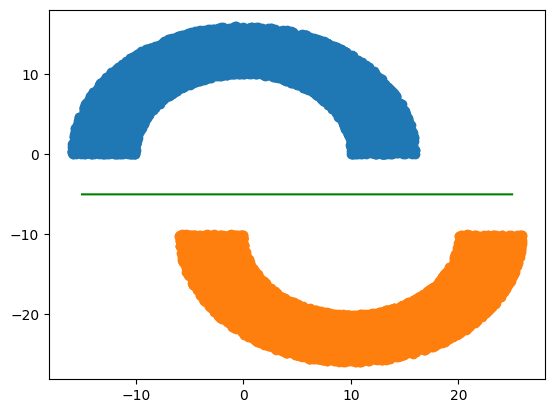

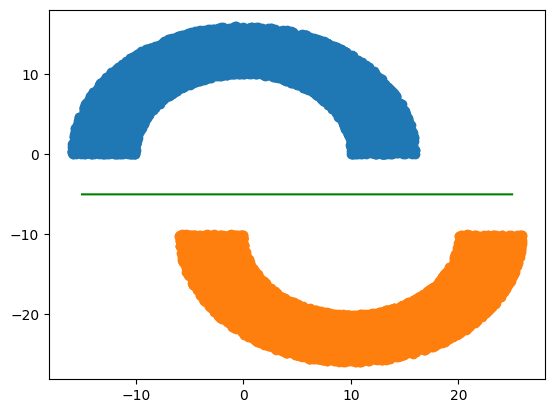

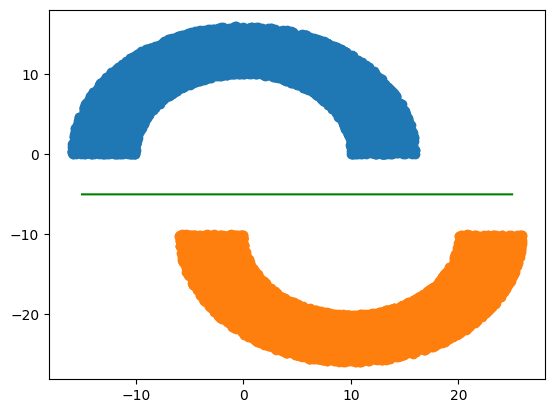

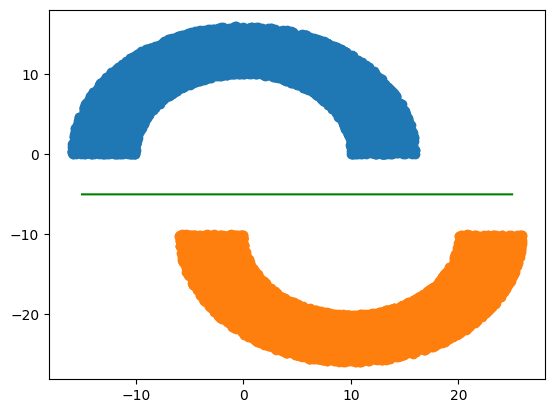

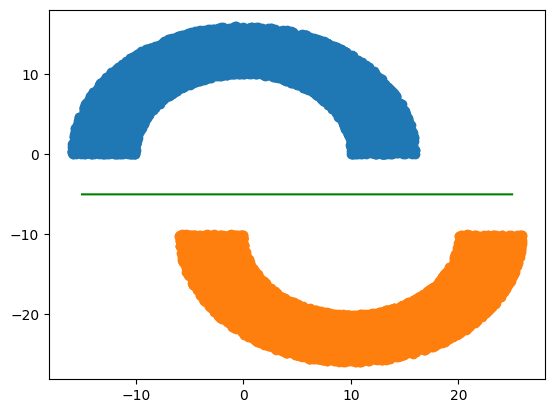

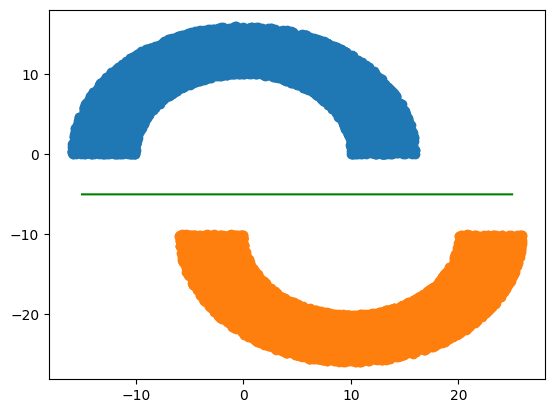

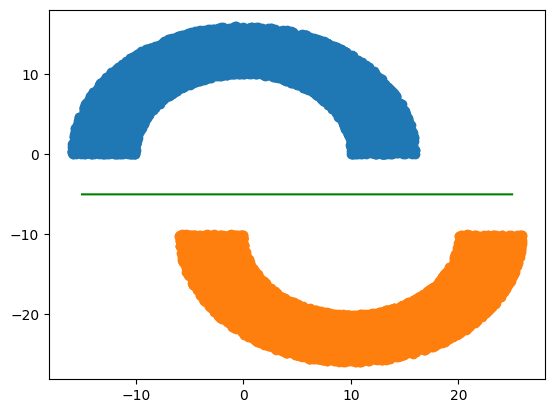

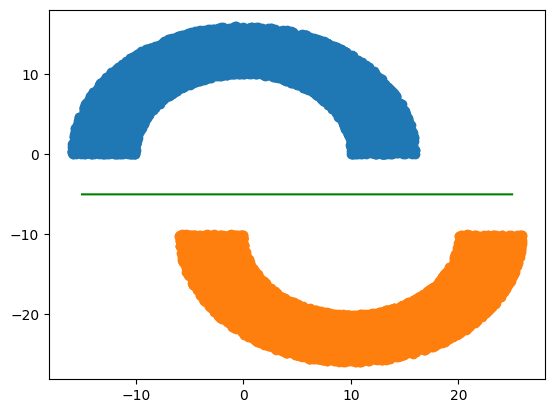

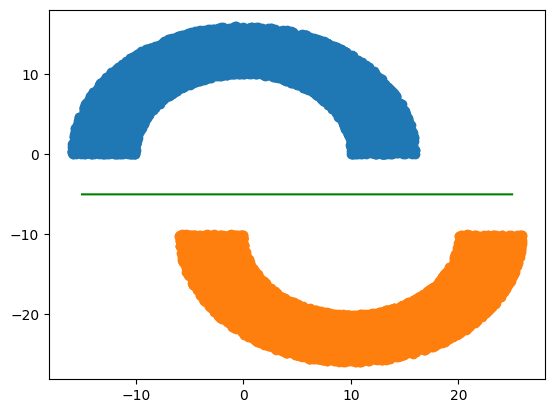

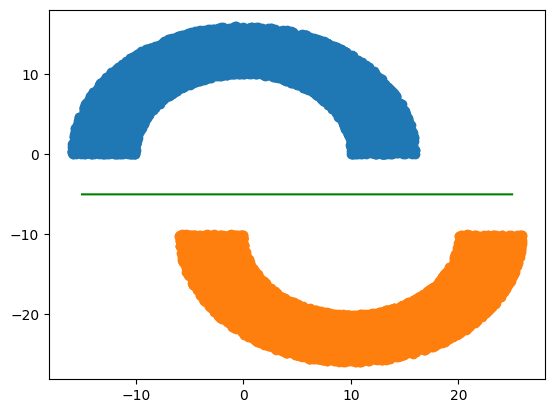

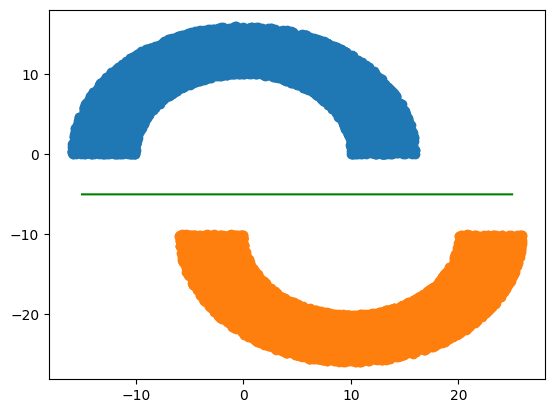

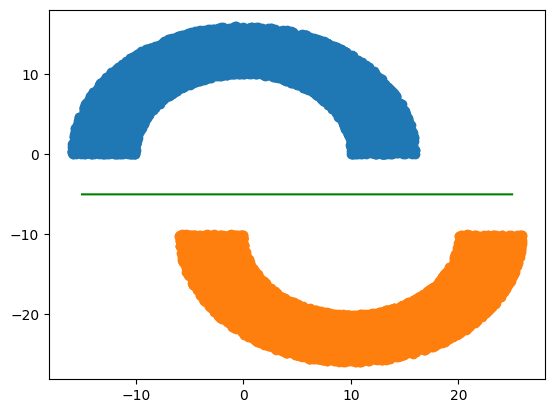

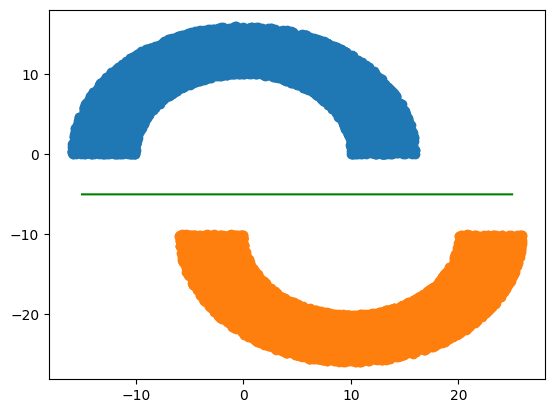

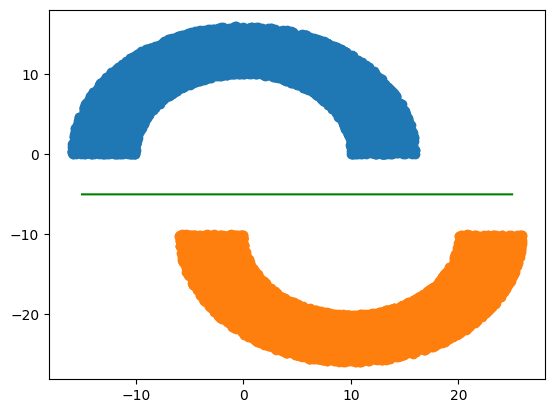

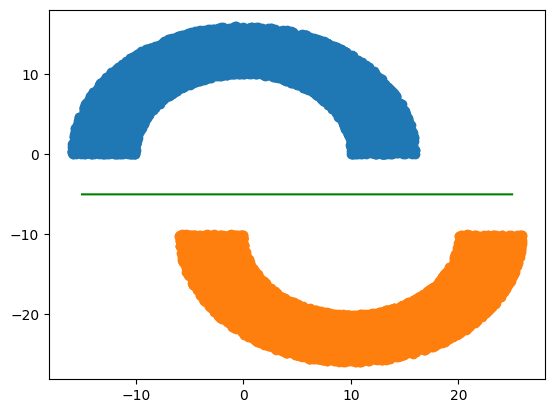

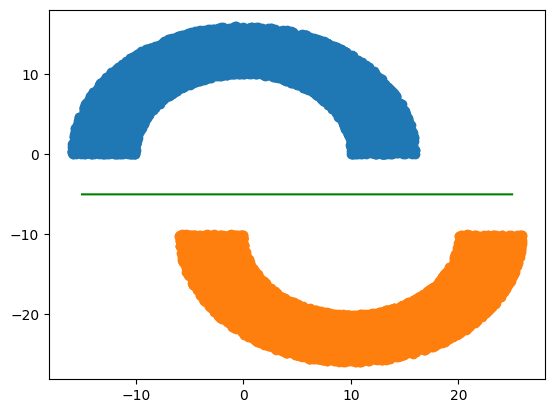

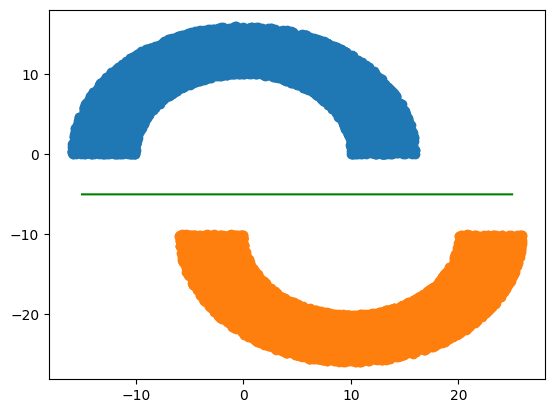

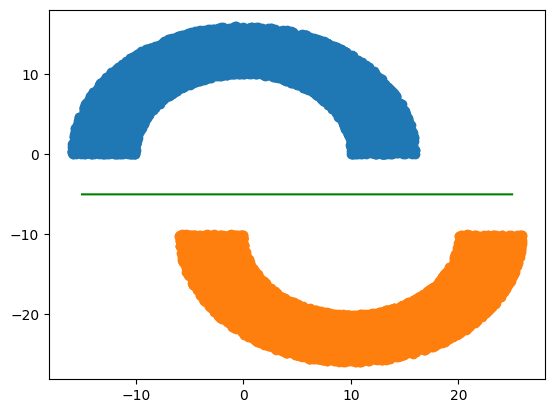

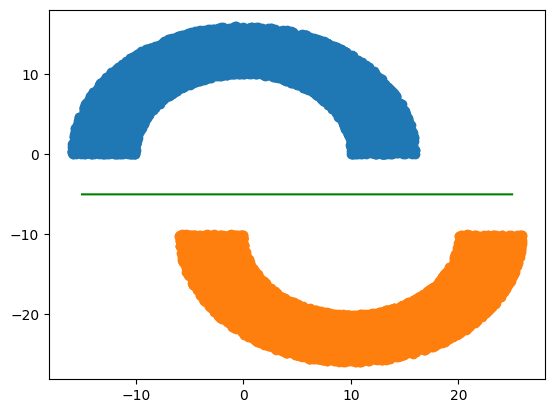

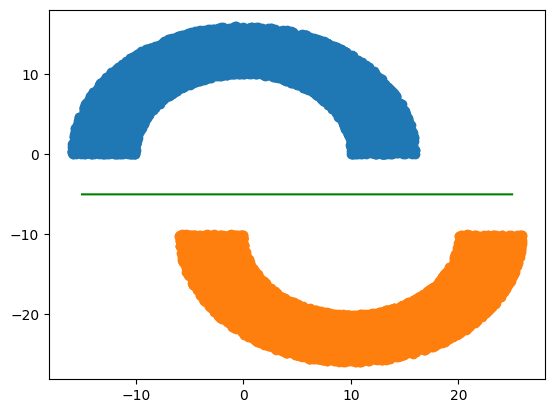

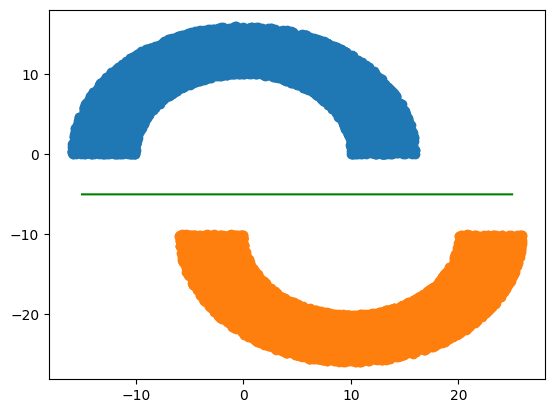

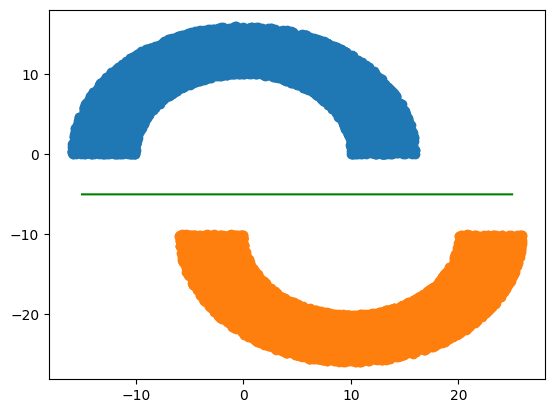

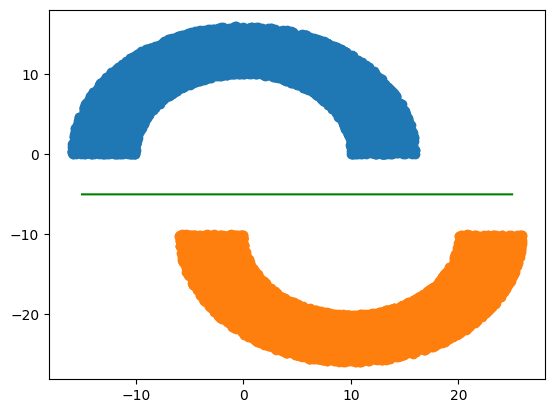

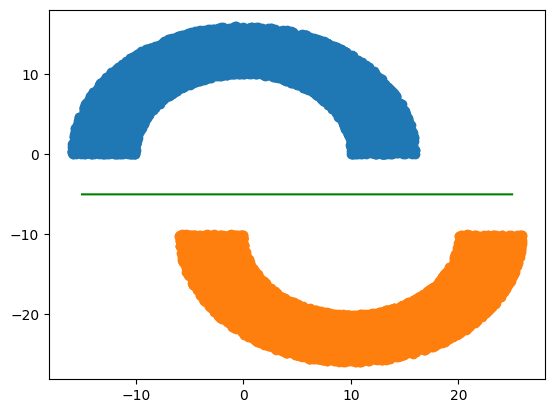

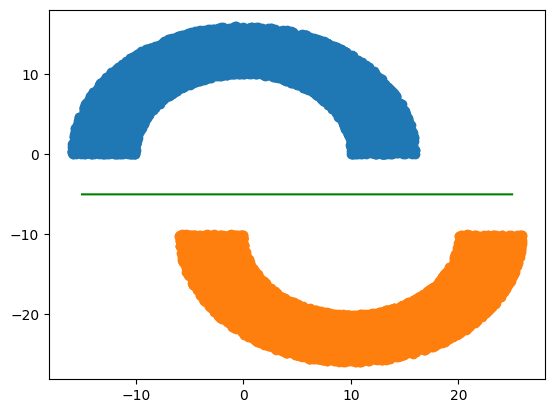

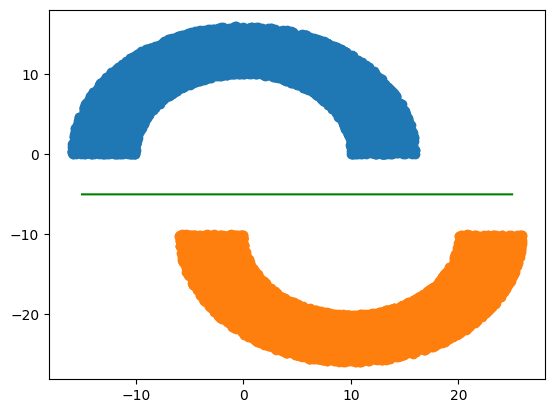

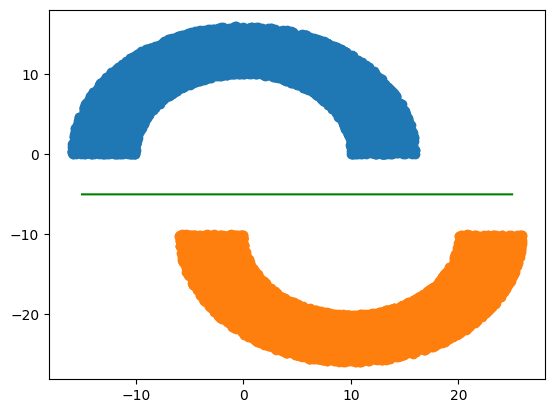

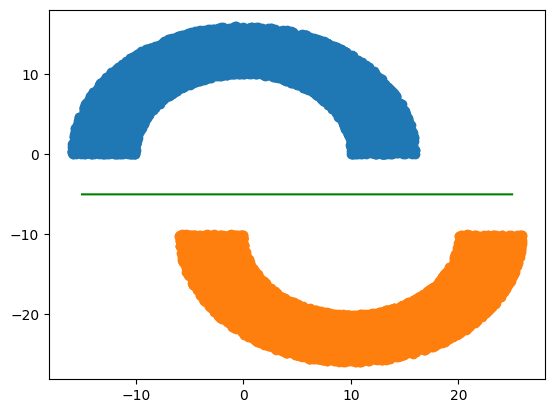

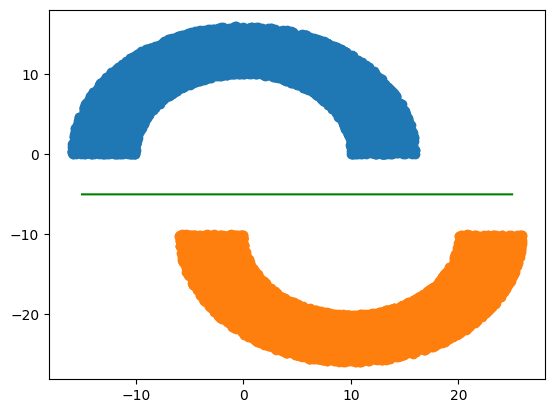

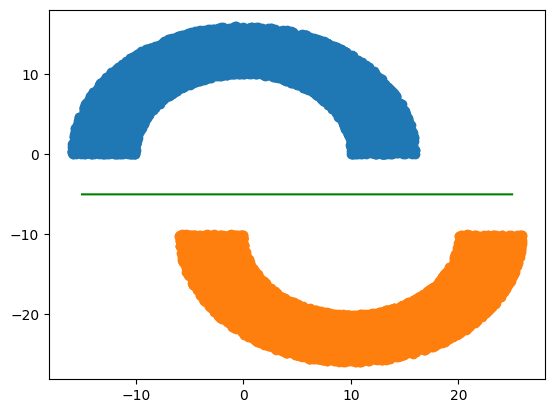

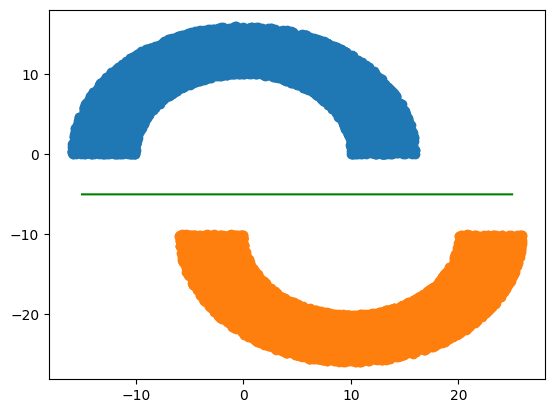

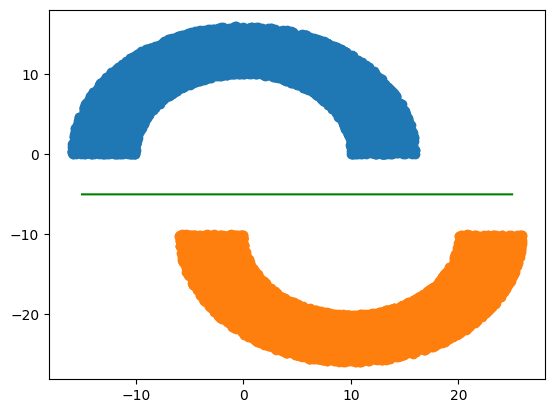

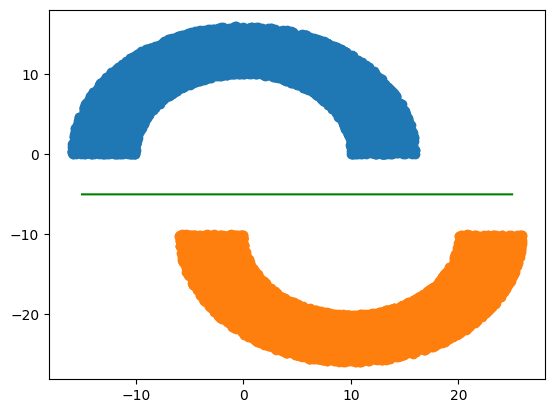

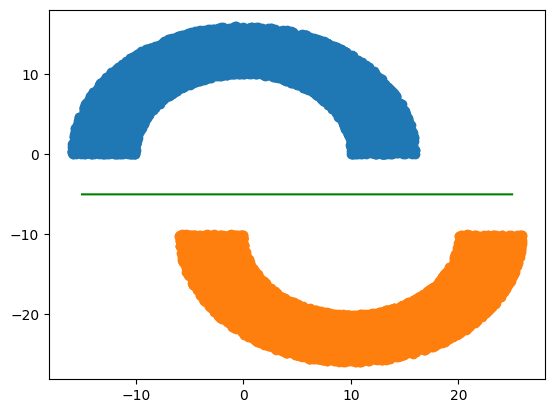

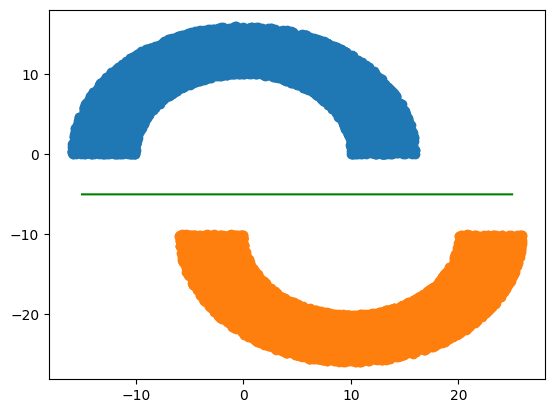

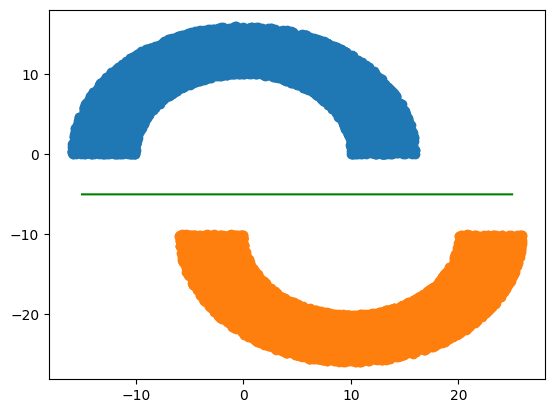

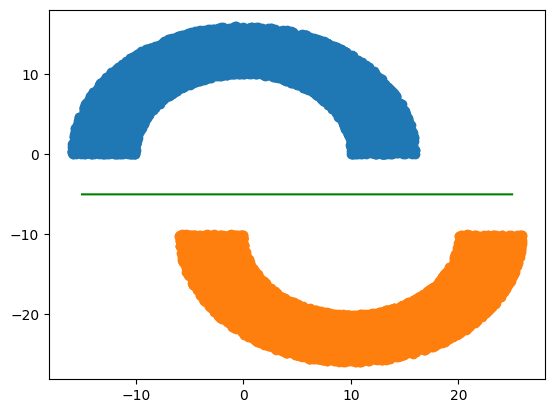

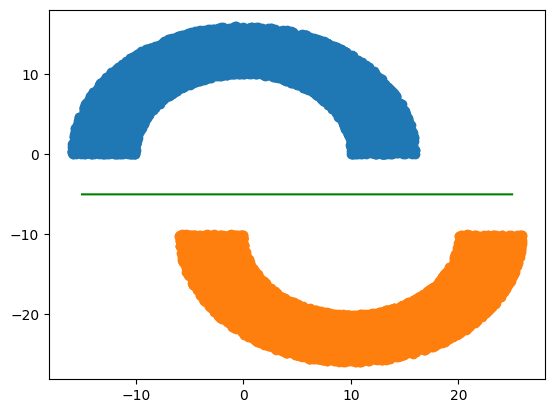

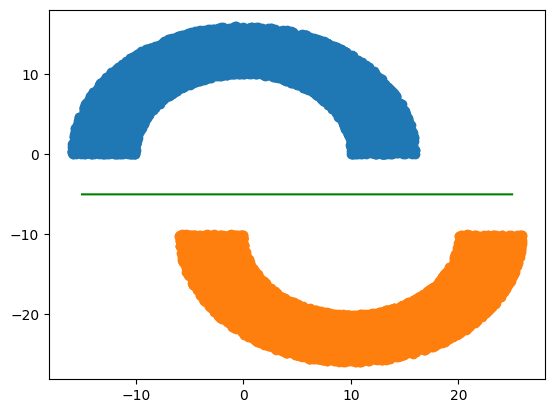

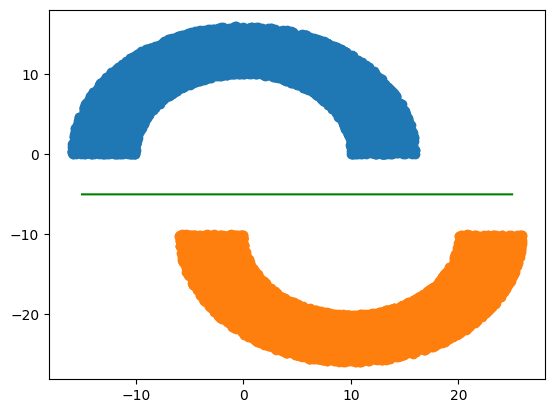

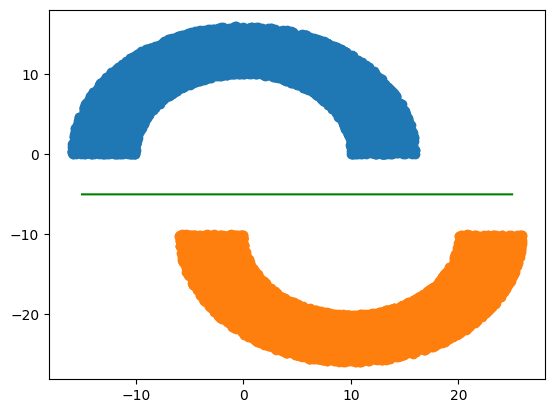

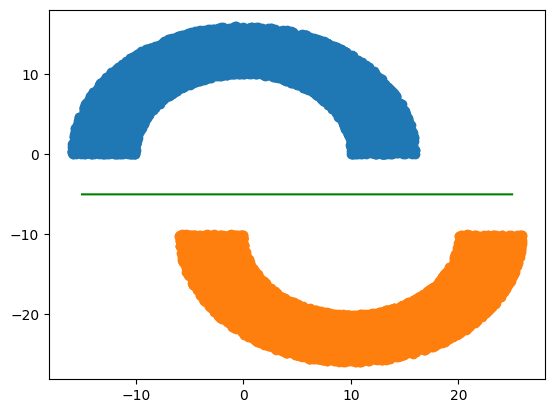

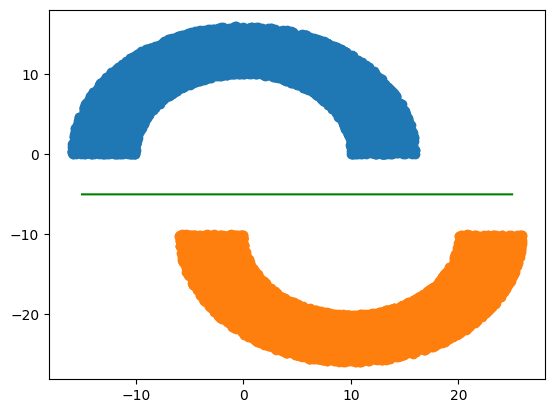

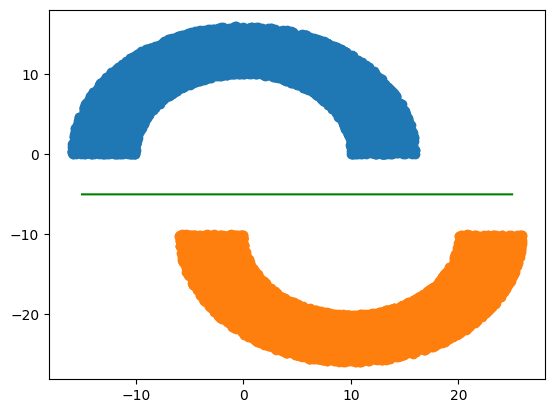

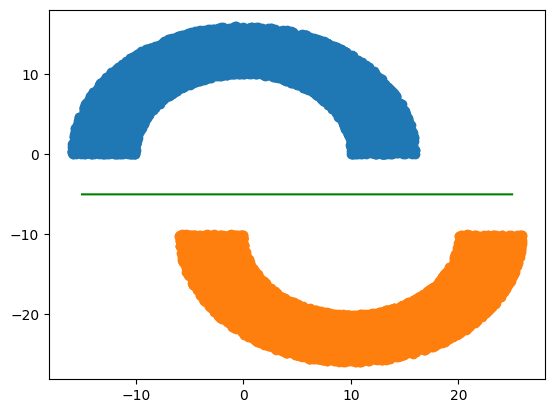

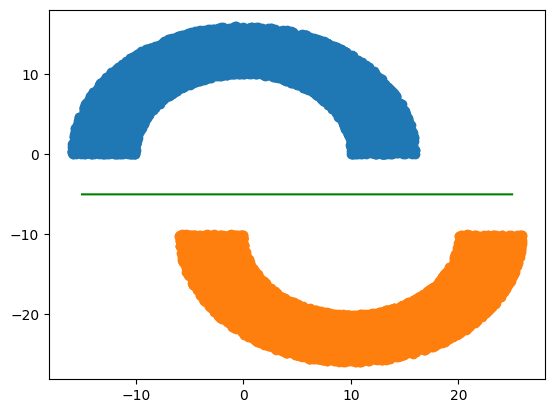

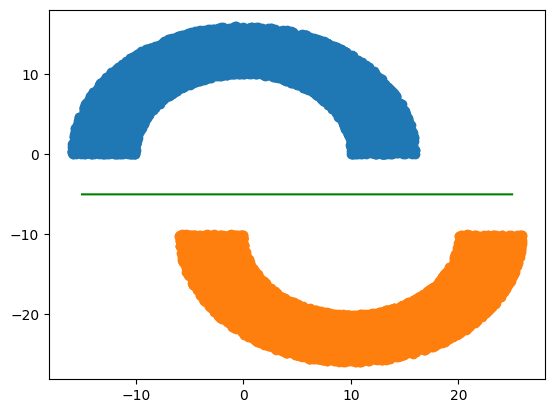

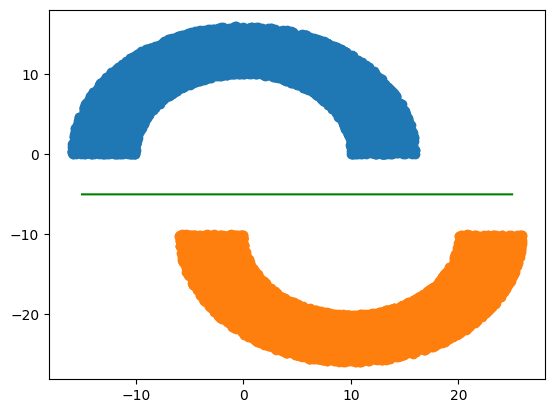

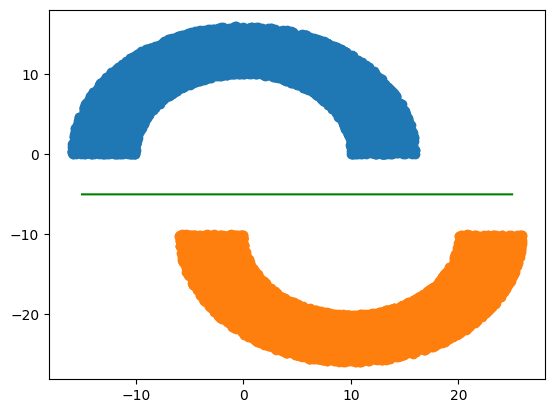

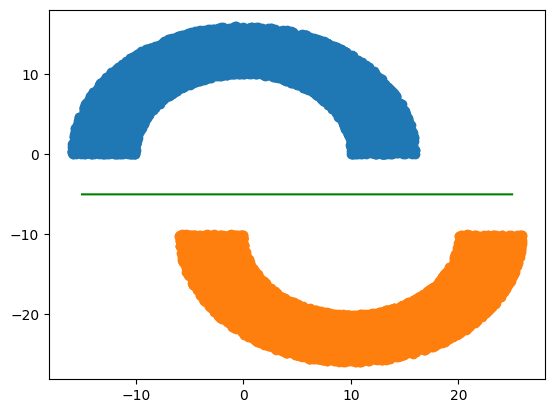

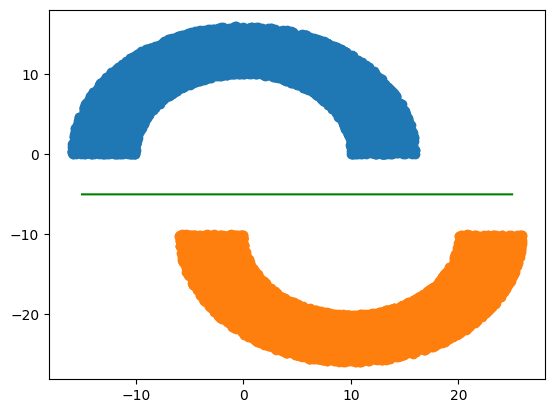

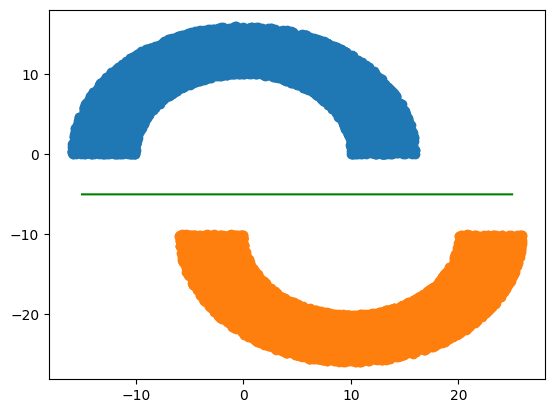

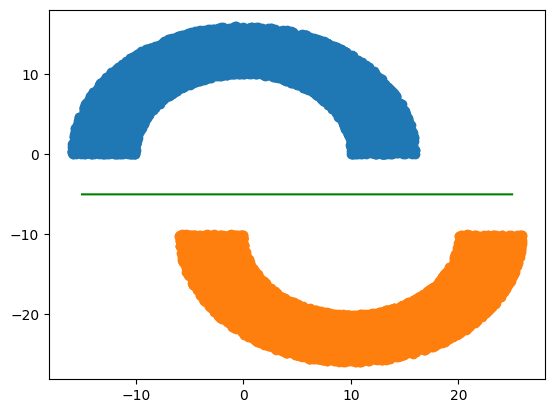

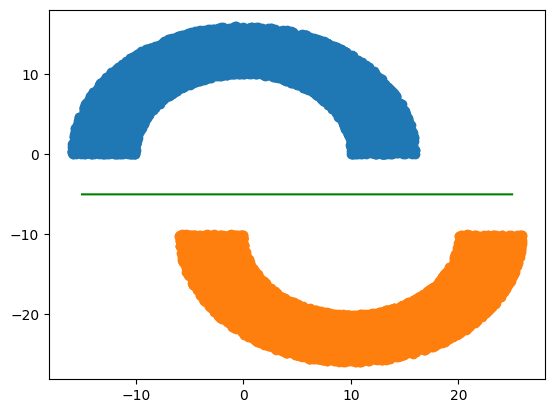

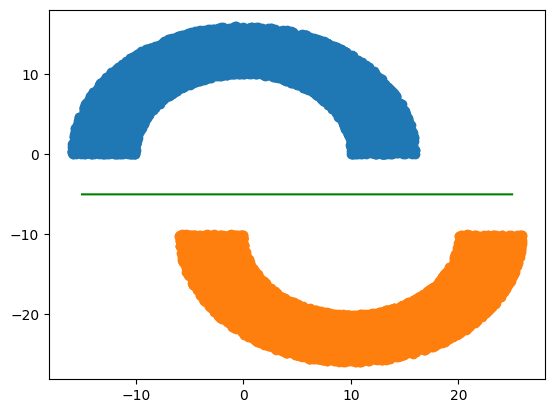

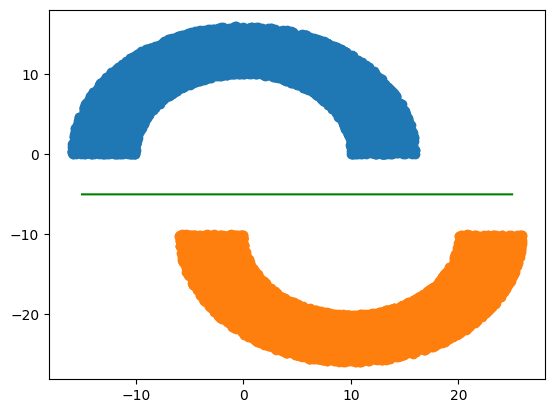

In [1848]:
i = 0
while i < epochs:
    xx = [-15 + i/250. for i in range(1, 10000)]
    yy = [-weights[0]*x/weights[1]-weights[2]/weights[1] for x in xx]
    plt.plot(xx,yy, 'green');
    plt.scatter(upper_moon.x, upper_moon.y);
    plt.scatter(bottom_moon.x, bottom_moon.y);
    plt.show()
    random.shuffle(inputs_and_labels)
    for x, y, label in inputs_and_labels:
        output = 1 if x*weights[0] + y*weights[1] + weights[2] > 0 else -1
        weights = error_correction_learning_rule(learning_rate, weights, label,
            output, (x,y,1)
        )
    i += 1
    # sleep(0.1)
    # plt.clf()